<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_POSTVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [698]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## Importing the dataset







In [699]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [700]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


Target Column

In [701]:
dataset['Post Value (millions)']

0            NaN
1            NaN
2            NaN
3        $166.00
4            NaN
         ...    
300          NaN
301          NaN
302      $247.25
303    $9,229.98
304    $9,229.98
Name: Post Value (millions), Length: 305, dtype: object

replacing $,',' values

In [702]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace("$","") # removing $ from MOIC

dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace("x","") # removing $ from MOIC
dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'Post Value (millions)'] = dataset.loc[:,'Post Value (millions)'].astype(float) # converting MOIC to float from string


In [703]:
dataset['Post Value (millions)'].count()

160

In [704]:
dataset['Post Value (millions)'].isna().sum()

145

In [705]:
dataset.dropna(subset = ["Post Value (millions)"], inplace=True) # Drop rows with no values from Target column

In [706]:
dataset.count()

Company PBID              160
Exit Date                 160
Exit Size (millions)      153
Pre Value (millions)       55
Post Value (millions)     160
                         ... 
Company City              160
Company State/Province    129
Company Post Code         141
Company Country           160
Year Founded              158
Length: 105, dtype: int64

In [707]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/EBITDA,160,100.000
Implied EV,160,100.000
Implied EV/EBIT,160,100.000
Implied EV/Net Income,160,100.000
Implied EV/Revenue,160,100.000
...,...,...
Raised to Date,10,6.250
Exit Size (millions),7,4.375
Total VC Capital Raised ($M)***,6,3.750
CEO PBId,5,3.125


Drop Column which has missing values more than 30%

In [708]:


dataset=dataset.drop(columns=[
'Deal Type',
'Implied EV/Cash Flow',
'Implied EV/Revenue',
'Implied EV/Net Income',
'Implied EV/EBITDA',
'Debt/EBITDA',
'Debt Type',
'Debt/Equity',
'Debt Type',
'Debt Amount 1',
'Valuation/Cash Flow',
'Valuation/EBITDA',
'Valuation/EBIT',
'Deal Size/Cash Flow',
'Valuation/Net Income',
'EBITDA Margin %',
'Gross Profit',
'Deal Size/EBITDA',
'Deal Size/EBIT',
'EBITDA',
'Total Debt (from financials)',
'Net Income',
'Deal Size/Net Income',
'EBIT',
'Revenue Growth since last debt deal',
'Valuation/Revenue',
'Pre Value (millions)',
'Deal Size/Revenue',
'Revenue',
'Price per Share',
'# Follow-on Investors',
'% Acquired',
'Employees',
'Pre-money Valuation',
'Total Preferred Capital Raised ($M) - Combination**',
'% Preferred Capital Raised - Combination**',
'% Preferred Capital Raised*',
'Total Preferred Capital Raised ($M)*',
'Deal Type 3',
'Debt Type 3',
'Debt Type 2'	,
'Debt Amount 3',
'Implied EV/EBIT',
'Implied EV',
'Contingent Payout',
'Debt Amount 2',
'Debt Raised in Round',
'Announced Date',
'Fiscal Year',
'VC Round Up/Down/Flat',
'Post Valuation',
'Post Valuation Status',
'Series',
])


In [709]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
3,81857-08,3/18/19,166.00,166.00,Merger/Acquisition,Early Stage VC,10.10,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,Texas,78626,United States,2013.0
7,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,86566-96T,179890-84,Information Technology,Software,Application Software,"Application Software*, Other Services (B2C Non...","Big Data, CloudTech & DevOps, Industrials, Int...","alerts service, cellular technology, data anal...",Formerly VC-backed,Generating Revenue,Venture Capital,161469-37P,"University of Waterloo, Bachelor's, Physics; W...",1,86566-96T,24-Jun-2015,0.07,Actual,0.07,NaN,NaN,Other,0.07,Completed,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),"Kitchener, Canada",Americas,North America,Kitchener,Ontario,N2G 1V9,Canada,2015.0
8,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,86567-86T,179890-84,Information Technology,Software,Application Software,"Application Software*, Other Services (B2C Non...","Big Data, CloudTech & DevOps, Industrials, Int...","alerts service, cellular technology, data anal...",Formerly VC-backed,Generating Revenue,Venture Capital,161469-37P,"University of Waterloo, Bachelor's, Physics; W...",2,86567-86T,17-Aug-2016,NaN,NaN,0.07,NaN,NaN,Other,NaN,Completed,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),"Kitchener, Canada",Americas,North America,Kitchener,Ontario,N2G 1V9,Canada,2015.0
9,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,86568-58T,179890-84,Information Technology,Software,Application Software,"Application Software*, Other Services (B2C Non...","Big Data, CloudTech & DevOps, Industrials, Int...","alerts service, cellular technology, data anal...",Formerly VC-backed,Generating Revenue,Venture Capital,161469-37P,"University of Waterloo, Bachelor's, Physics; W...",3,86568-58T,23-Nov-2016,0.10,Actual,0.17,NaN,NaN,Other,0.10,Completed,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),"Kitchener, Canada",Americas,North America,Kitchener,Ontario,N2G 1V9,Canada,2015.0
10,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,App

In [710]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])




In [711]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['MOIC','Company PBID','Exit Date','Exit Size (millions)','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId','Native Currency of Deal','Current Financing Status','Current Business Status'])





In [712]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Year Founded
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,2013.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07,0.07,NaN,0.07,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,2015.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.07,NaN,NaN,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,2015.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10,0.17,NaN,0.10,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,2015.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.17,1st Round,NaN,Generating Revenue,Venture Capital-Backed,4.0,4.0,18,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,NaN,2005.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,13.0,5.0,NaN,2005.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NaN,China,"Publicly Listed, Venture Capital",NaN,67.53,67.53,1st Round,67.53,Profitable,Venture Capital-Backed,2.0,2.0,801,2008.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",2011.0


In [713]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

3       8.0
7       6.0
8       6.0
9       6.0
10      6.0
       ... 
297    16.0
298    16.0
302    13.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 160, dtype: float64

In [714]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Total duration for Company
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,8.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07,0.07,NaN,0.07,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,6.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.07,NaN,NaN,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,6.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10,0.17,NaN,0.10,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,6.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.17,1st Round,NaN,Generating Revenue,Venture Capital-Backed,4.0,4.0,18,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,NaN,16.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,13.0,5.0,NaN,16.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NaN,China,"Publicly Listed, Venture Capital",NaN,67.53,67.53,1st Round,67.53,Profitable,Venture Capital-Backed,2.0,2.0,801,13.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",10.0


In [715]:
# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

In [716]:
dataset['# Investors']

3       2.0
7       2.0
8       2.0
9       2.0
10      8.0
       ... 
297     NaN
298    18.0
302     4.0
303    12.0
304    14.0
Name: # Investors, Length: 160, dtype: float64

In [717]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,2.0,6,8.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07,0.07,NaN,0.07,Generating Revenue,Accelerator/Incubator Backed,2.0,18,6.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.07,NaN,NaN,Generating Revenue,Accelerator/Incubator Backed,2.0,18,6.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10,0.17,NaN,0.10,Generating Revenue,Accelerator/Incubator Backed,2.0,18,6.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.17,1st Round,NaN,Generating Revenue,Venture Capital-Backed,8.0,18,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,16.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,18.0,NaN,16.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NaN,China,"Publicly Listed, Venture Capital",NaN,67.53,67.53,1st Round,67.53,Profitable,Venture Capital-Backed,4.0,801,13.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,12.0,"3,871",10.0


**Cleaning column Values to Numerical only ( removing $,x)**

## Filling Missing Values

In [718]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
State,36,22.500
Total Invested Equity,34,21.250
CEO Education,33,20.625
# Investors,29,18.125
Deal Size,29,18.125
Current Employees,20,12.500
VC Round,16,10.000
Raised to Date,10,6.250
Total duration for Company,2,1.250


In [719]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})


In [720]:
# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))


In [721]:
# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))


In [722]:
# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

In [723]:
# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

In [724]:
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


In [725]:
dataset['VC Round']

3      1st Round
7      not known
8      not known
9      not known
10     1st Round
         ...    
297    9th Round
298    8th Round
302    1st Round
303    5th Round
304    4th Round
Name: VC Round, Length: 160, dtype: object

## Encoding categorical data

### Encoding the Independent Variable as One hot Encoder

Label Encoding of Categorical Variable

In [726]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


dataset['Exit Type'] = le.fit_transform(dataset['Exit Type'])

dataset['Last VC Deal Type'] = le.fit_transform(dataset['Last VC Deal Type'])

dataset['Industry Sector'] = le.fit_transform(dataset['Industry Sector'])

dataset['Industry Group'] = le.fit_transform(dataset['Industry Group'])

dataset['Industry Code'] = le.fit_transform(dataset['Industry Code'])

dataset['Verticals_x'] = le.fit_transform(dataset['Verticals_x'])

dataset['City'] = le.fit_transform(dataset['City'])

dataset['State'] = le.fit_transform(dataset['State'])

dataset['Country'] = le.fit_transform(dataset['Country'])

#dataset['Current Financing Status'] = le.fit_transform(dataset['Current Financing Status'])
#dataset['Current Business Status'] = le.fit_transform(dataset['Current Business Status'])
dataset['Universe'] = le.fit_transform(dataset['Universe'])
dataset['CEO Education'] = le.fit_transform(dataset['CEO Education'])
dataset['VC Round'] = le.fit_transform(dataset['VC Round'])
dataset['Business Status'] = le.fit_transform(dataset['Business Status'])
dataset['Financing Status'] = le.fit_transform(dataset['Financing Status'])

dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company
3,166.00,2,1,1,4,2,20,13,12,9,10,5,10.10000,10.10,2,10.100000,0,4,2.000000,6.000000,8.0
7,14.10,2,1,1,4,0,12,16,10,2,10,64,0.07000,0.07,12,0.070000,0,0,2.000000,18.000000,6.0
8,14.10,2,1,1,4,0,12,16,10,2,10,64,61.76626,0.07,12,60.941349,0,0,2.000000,18.000000,6.0
9,14.10,2,1,1,4,0,12,16,10,2,10,64,0.10000,0.17,12,0.100000,0,0,2.000000,18.000000,6.0
10,14.10,2,1,1,4,0,12,16,10,2,10,64,61.76626,0.17,2,60.941349,0,4,8.000000,18.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,2,12,1,4,3,28,15,7,9,4,16,12.13000,165.10,10,12.130000,0,4,7.633588,909.885714,16.0
298,40.00,2,12,1,4,3,28,15,7,9,4,8,51.35000,139.00,9,51.350000,0,4,18.000000,909.885714,16.0
302,247.25,1,0,1,0,4,10,2,6,3,9,35,67.53000,67.53,2,67.530000,3,4,4.000000,801.000000,13.0
303,9229.98,1,9,1,4,3,26,24,0,9,9,35,114.97000,160.75,6,114.970000,0,4,12.000000,3871.000000,10.0


In [727]:
# removing original columns after label encoding



#dataset=dataset.drop(columns=['State','Exit Type','Last VC Deal Type','Industry Sector','Industry Group','Industry Code','Verticals_x','City','State','Country'])

#dataset=dataset.drop(columns=['Current Financing Status','Current Business Status','Universe','CEO Education','VC Round','Business Status','Financing Status','Native Currency of Deal'])			  	 


dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company
3,166.00,2,1,1,4,2,20,13,12,9,10,5,10.10000,10.10,2,10.100000,0,4,2.000000,6.000000,8.0
7,14.10,2,1,1,4,0,12,16,10,2,10,64,0.07000,0.07,12,0.070000,0,0,2.000000,18.000000,6.0
8,14.10,2,1,1,4,0,12,16,10,2,10,64,61.76626,0.07,12,60.941349,0,0,2.000000,18.000000,6.0
9,14.10,2,1,1,4,0,12,16,10,2,10,64,0.10000,0.17,12,0.100000,0,0,2.000000,18.000000,6.0
10,14.10,2,1,1,4,0,12,16,10,2,10,64,61.76626,0.17,2,60.941349,0,4,8.000000,18.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,2,12,1,4,3,28,15,7,9,4,16,12.13000,165.10,10,12.130000,0,4,7.633588,909.885714,16.0
298,40.00,2,12,1,4,3,28,15,7,9,4,8,51.35000,139.00,9,51.350000,0,4,18.000000,909.885714,16.0
302,247.25,1,0,1,0,4,10,2,6,3,9,35,67.53000,67.53,2,67.530000,3,4,4.000000,801.000000,13.0
303,9229.98,1,9,1,4,3,26,24,0,9,9,35,114.97000,160.75,6,114.970000,0,4,12.000000,3871.000000,10.0


Changing Data type of Column to perform correlation matrix

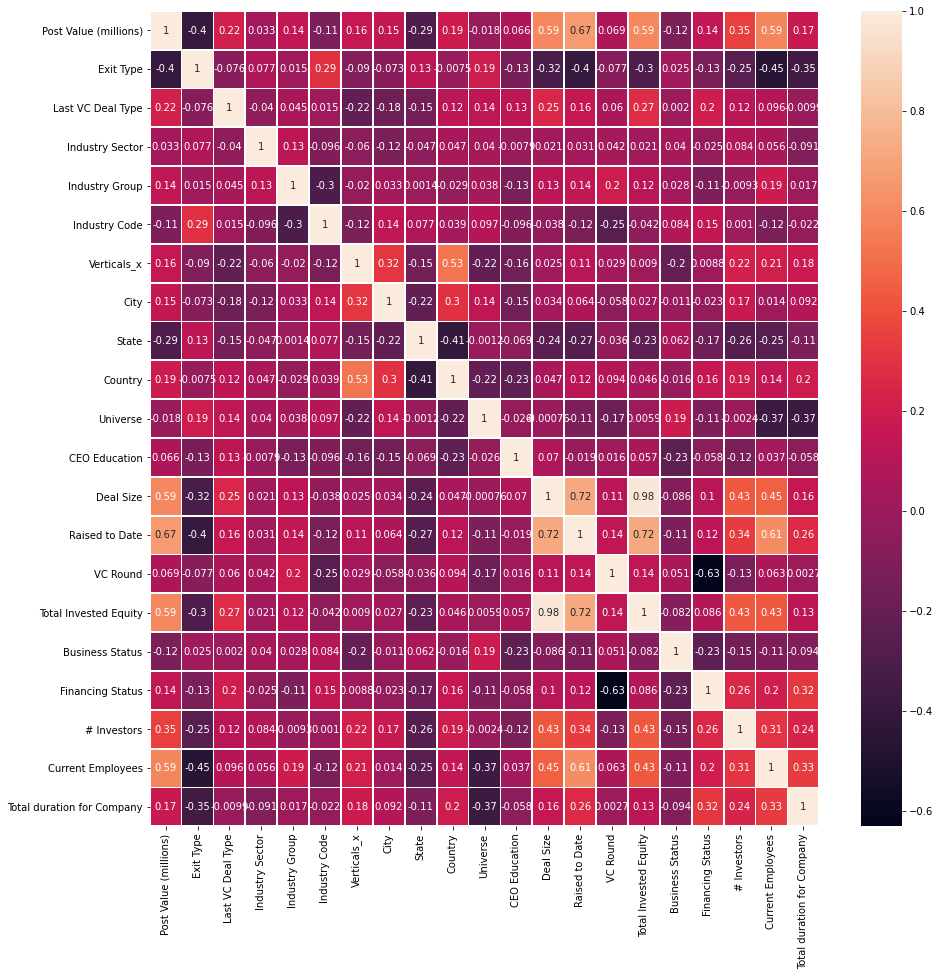

In [728]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Drop Column with high correlation with other columns

In [729]:
dataset=dataset.drop(columns=['Deal Size'])

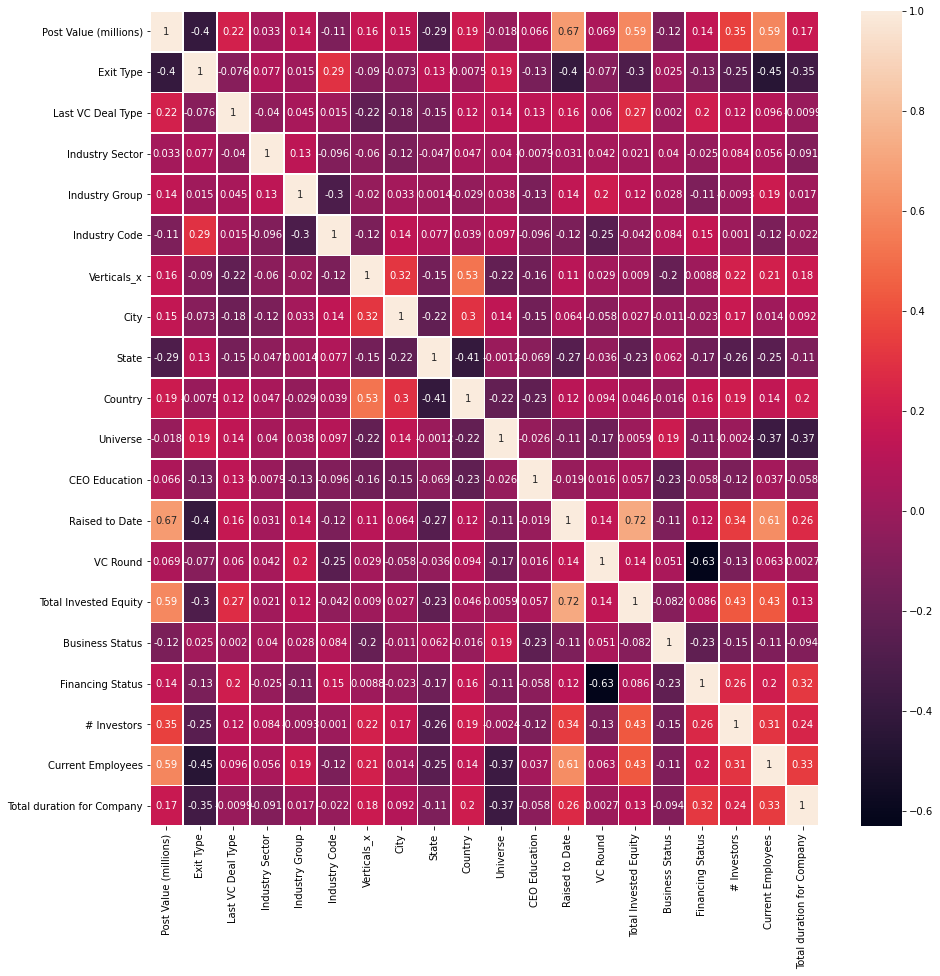

In [730]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

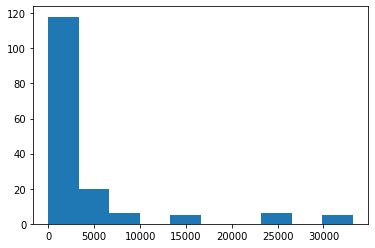

In [731]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['Post Value (millions)'])
pyplot.show()

In [732]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Universe,CEO Education,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company
3,166.00,2,1,1,4,2,20,13,12,9,10,5,10.10,2,10.100000,0,4,2.000000,6.000000,8.0
7,14.10,2,1,1,4,0,12,16,10,2,10,64,0.07,12,0.070000,0,0,2.000000,18.000000,6.0
8,14.10,2,1,1,4,0,12,16,10,2,10,64,0.07,12,60.941349,0,0,2.000000,18.000000,6.0
9,14.10,2,1,1,4,0,12,16,10,2,10,64,0.17,12,0.100000,0,0,2.000000,18.000000,6.0
10,14.10,2,1,1,4,0,12,16,10,2,10,64,0.17,2,60.941349,0,4,8.000000,18.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,2,12,1,4,3,28,15,7,9,4,16,165.10,10,12.130000,0,4,7.633588,909.885714,16.0
298,40.00,2,12,1,4,3,28,15,7,9,4,8,139.00,9,51.350000,0,4,18.000000,909.885714,16.0
302,247.25,1,0,1,0,4,10,2,6,3,9,35,67.53,2,67.530000,3,4,4.000000,801.000000,13.0
303,9229.98,1,9,1,4,3,26,24,0,9,9,35,160.75,6,114.970000,0,4,12.000000,3871.000000,10.0


In [733]:

X = dataset.loc[:,dataset.columns!='Post Value (millions)']
Y = dataset['Post Value (millions)']

## Splitting the dataset into the Training set and Test set

In [734]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

Defining reusable function for model performance evaluation

In [735]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    
   
    RRSE_train = np.sqrt(np.mean((np.square(y_train-y_predtrain))/(np.square(np.mean(y_train)-y_train))))
    print( f"Root relative squared Train error is {RRSE_train}")
    RRSE_test = np.sqrt(np.mean((np.square(y_test-y_predtest))/(np.square(np.mean(y_test)-y_test))))
    print( f"Root relative squared Test error is {RRSE_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test.values
    print(f"{pr1}")

   
  

### Model Building

Linear Regression

In [736]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [737]:
y_predtestlin= multlin_model.predict(X_test)

y_predtrainlin = multlin_model.predict(X_train)


In [738]:
y_predtrain.mean(axis=0)

3229.6829

Evaluate Model Performance

In [739]:
eval_result(y_train,y_predtrainlin,y_test,y_predtestlin)

RMSE Train error is 4690.0775099184975
RMSE Test error is 5390.867204670151
MAE Train error is 2795.1328072460146
MAE Test error is 2669.7870368907506
Root relative squared Train error is 15.141632990760128
Root relative squared Test error is 1.8116695171002863
            Pred    Actual
0     494.893560     43.50
1    -519.557160    125.13
2    7034.173207   4100.00
3   -2337.213686      5.10
4    -565.148210    163.80
5    -407.140677    239.69
6     387.243249    125.13
7    1721.201116     47.90
8   -2914.039047     70.00
9   -1484.774787      0.58
10     -3.996080      5.10
11   7133.326767   3901.71
12   3920.913669     40.61
13   1940.366897     49.20
14   1402.400459    250.00
15   -945.539467      5.10
16    679.743128    179.00
17   -175.308971     42.00
18   3991.037684    487.11
19   3618.628206   3489.49
20  14428.668996  13695.10
21  -3324.055513      4.00
22  -1120.491959    495.00
23    258.788061     16.00
24   2738.871108    163.21
25   1970.177353   3657.35
26   8158

Ridge Regression

---



In [740]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [741]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 5922.374
Config: {'alpha': 0.99}


In [742]:

ridge_model= Ridge(alpha=0.99)
ridge_model.fit(X_train,y_train)




Ridge(alpha=0.99, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [743]:
y_predtrainridge= ridge_model.predict(X_train)

y_predtestridge= ridge_model.predict(X_test)



Evaluating model performance

In [744]:
eval_result(y_train,y_predtrainridge,y_test,y_predtestridge)

RMSE Train error is 4690.520502189904
RMSE Test error is 5381.123434701316
MAE Train error is 2797.4124390660963
MAE Test error is 2661.228613168073
Root relative squared Train error is 15.145854446907382
Root relative squared Test error is 1.8075397123836445
            Pred    Actual
0     521.557495     43.50
1    -494.913768    125.13
2    6999.420983   4100.00
3   -2330.063910      5.10
4    -596.894273    163.80
5    -401.203658    239.69
6     406.330528    125.13
7    1723.695124     47.90
8   -2849.037807     70.00
9   -1428.237644      0.58
10    -16.647141      5.10
11   7106.756527   3901.71
12   3898.475243     40.61
13   1907.705689     49.20
14   1435.223015    250.00
15   -953.794441      5.10
16    727.214061    179.00
17   -198.074070     42.00
18   3969.145303    487.11
19   3598.155948   3489.49
20  14422.587863  13695.10
21  -3224.175855      4.00
22  -1119.000828    495.00
23    254.587029     16.00
24   2731.540983    163.21
25   1938.029617   3657.35
26   8096.9

In [745]:
#ridge_regressor.cv_results_

### Lasso Regression

In [746]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131393583.263602, tolerance: 641956.6311617412
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-

In [747]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 5925.272
 {'alpha': 0.99}


In [748]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrainlasso= lasso_model.predict(X_train)



In [749]:
y_predtestlasso= ridge_model.predict(X_test)



Model Performance Evaluation

In [750]:
eval_result(y_train,y_predtrainlasso,y_test,y_predtestlasso)

RMSE Train error is 4690.090468160567
RMSE Test error is 5381.123434701316
MAE Train error is 2795.4340660180505
MAE Test error is 2661.228613168073
Root relative squared Train error is 15.142019229867017
Root relative squared Test error is 1.8075397123836445
            Pred    Actual
0     521.557495     43.50
1    -494.913768    125.13
2    6999.420983   4100.00
3   -2330.063910      5.10
4    -596.894273    163.80
5    -401.203658    239.69
6     406.330528    125.13
7    1723.695124     47.90
8   -2849.037807     70.00
9   -1428.237644      0.58
10    -16.647141      5.10
11   7106.756527   3901.71
12   3898.475243     40.61
13   1907.705689     49.20
14   1435.223015    250.00
15   -953.794441      5.10
16    727.214061    179.00
17   -198.074070     42.00
18   3969.145303    487.11
19   3598.155948   3489.49
20  14422.587863  13695.10
21  -3224.175855      4.00
22  -1119.000828    495.00
23    254.587029     16.00
24   2731.540983    163.21
25   1938.029617   3657.35
26   8096.9

In [751]:
# Read out attributes
coeffs = lasso_model.coef_         # dense np.array

#coeffs = lasso_model.sparse_coef_  # sparse matrix

#coeffs = lasso_model.intercept_    # probably also releva

coeffs



array([-1242.56247938,  -102.17343121, -1262.0718047 ,   302.44689894,
         -12.36957441,    18.64912502,     9.93471415,   -55.62735451,
         346.23083511,   543.52602043,    31.66324155,     7.91779348,
          88.93163446,    11.96222253,  -235.04948541,   321.88694332,
         118.6821057 ,     1.69267267,   -29.29415727])

### XGBOOST

In [752]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gbtree", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 
y_predtrain= xgb_r.predict(train_dmatrix)
y_predtest = xgb_r.predict(test_dmatrix) 
  


[00:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model Performance Evaluation

In [753]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 513.4933021382326
RMSE Test error is 763.8234976720872
MAE Train error is 202.99064562618736
MAE Test error is 294.30197435379034
Root relative squared Train error is 0.3178506346250984
Root relative squared Test error is 0.39010354102131967
            Pred    Actual
0      61.585888     43.50
1     126.165253    125.13
2    3828.703613   4100.00
3      50.549366      5.10
4     139.820663    163.80
5     244.298355    239.69
6     141.868744    125.13
7     146.088669     47.90
8      22.932690     70.00
9       2.451207      0.58
10     29.652267      5.10
11   3555.220703   3901.71
12     58.717796     40.61
13    161.517822     49.20
14    205.753128    250.00
15     29.652267      5.10
16    179.847610    179.00
17     30.693195     42.00
18    403.200470    487.11
19   3301.616455   3489.49
20  13176.648438  13695.10
21      5.304141      4.00
22    452.620056    495.00
23     29.652267     16.00
24    117.327972    163.21
25   3516.284180   3657.35
26   5458

In [754]:
xgb_r.get_score(importance_type='weight')


{'# Investors': 6,
 'Business Status': 1,
 'CEO Education': 10,
 'City': 8,
 'Country': 1,
 'Current Employees': 38,
 'Exit Type': 18,
 'Industry Code': 23,
 'Industry Group': 1,
 'Industry Sector': 5,
 'Last VC Deal Type': 56,
 'Raised to Date': 7,
 'State': 3,
 'Total Invested Equity': 6,
 'Total duration for Company': 4,
 'Universe': 4,
 'VC Round': 6,
 'Verticals_x': 16}